In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import os

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

**Cargamos el dataset de los jugadores FIFA20**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/Diplo Famaf/AprendizajeNOSupervisado/2020/'
df_20=pd.read_csv(os.path.join(DATA_DIRECTORY,"players_20.csv"))

In [5]:
'''
df_20=pd.read_csv("/home/fede-sepu/Diplo_dc/AprendisajeNoSupervisado/AprendizajeNOSupervisado/Practico/Data/players_20.csv")
df_teams= pd.read_csv("/home/fede-sepu/Diplo_dc/AprendisajeNoSupervisado/AprendizajeNOSupervisado/Practico/Data/teams_and_leagues.csv")
df_20.shape,df_teams.shape
'''

'\ndf_20=pd.read_csv("/home/fede-sepu/Diplo_dc/AprendisajeNoSupervisado/AprendizajeNOSupervisado/Practico/Data/players_20.csv")\ndf_teams= pd.read_csv("/home/fede-sepu/Diplo_dc/AprendisajeNoSupervisado/AprendizajeNOSupervisado/Practico/Data/teams_and_leagues.csv")\ndf_20.shape,df_teams.shape\n'

**Analizamos y exploramos el dataset**

In [6]:
df_20.sample(5)

sofifa_id                                         player_url  \
16326     200365  https://sofifa.com/player/200365/kristijan-mil...   
14464     221652  https://sofifa.com/player/221652/sergio-gonzal...   
12028     209253  https://sofifa.com/player/209253/matty-blair/2...   
9089      252692  https://sofifa.com/player/252692/shamar-nichol...   
3281      234870  https://sofifa.com/player/234870/efecan-karaca...   

         short_name                 long_name  age         dob  height_cm  \
16326   K. Miljević        Kristijan Miljević   26  1992-07-15        180   
14464        Sergio  Sergio González Poirrier   27  1992-04-20        188   
12028      M. Blair               Matty Blair   30  1989-06-21        178   
9089   S. Nicholson          Shamar Nicholson   22  1997-03-16        192   
3281      E. Karaca             Efecan Karaca   29  1989-11-16        166   

       weight_kg nationality                   club  overall  potential  \
16326         75      Serbia         AFC Eskilstuna       58         58   
14464         74       Spain            CD Mirandés       61         64   
12028         74     England       Doncaster Rovers       64         64   
9089          80     Jamaica  Sporting de Charleroi       66         73   
3281          56      Turkey             Alanyaspor       73         73   

       value_eur  wage_eur player_positions preferred_foot  \
16326     140000      1000               RM           Left   
14464     270000      2000               CB          Right   
12028     350000      3000       RB, RM, CM          Right   
9089      925000      4000               ST          Right   
3281     3900000     13000          RM, CAM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
16326                         1          3            2  Medium/Medium   
14464                         1          3            2  Medium/Medium   
12028                         1          3            3  Medium/Medium   
9089                          1          3            3  Medium/Medium   
3281                          1          4            3    High/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
16326    Normal        No            175000.0         NaN           SUB   
14464    Normal        No            439000.0         NaN           SUB   
12028    Normal        No            613000.0         NaN           SUB   
9089     Normal        No           1600000.0         NaN           SUB   
3281       Lean        No           7800000.0         NaN            RM   

       team_jersey_number loaned_from      joined  contract_valid_until  \
16326                14.0         NaN  2018-07-29                2019.0   
14464                 4.0         NaN  2018-07-23                2020.0   
12028                17.0         NaN  2016-07-01                2020.0   
9089                 16.0         NaN  2019-08-13                2023.0   
3281                  7.0         NaN  2013-07-17                2022.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
16326             NaN                   NaN  64.0      57.0     53.0   
14464             NaN                   NaN  52.0      35.0     37.0   
12028             NaN                   NaN  85.0      56.0     58.0   
9089              NaN                   NaN  68.0      70.0     56.0   
3281              NaN                   NaN  83.0      63.0     65.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
16326       58.0       32.0    55.0        NaN          NaN         NaN   
14464       37.0       64.0    58.0        NaN          NaN         NaN   
12028       63.0       56.0    65.0        NaN          NaN         NaN   
9089        61.0       22.0    70.0        NaN          NaN         NaN   
3281        78.0       44.0    50.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning  \
16326         

In [7]:
df_20.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

In [8]:
# Revisamos si existen jugadores duplicados

df_20[df_20.short_name.duplicated(keep=False)].sofifa_id.count()

1620

In [9]:
df_20[df_20.short_name == 'L. Messi']

sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes         195800000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  \
0       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   

   attacking_volleys  skill_dribbling  ...  movement_acceleration  \
0                 88               97  ...                     91   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   

   goalkeeping_reflexes    ls    st    rs    lw    lf    cf    rf    rw   lam  \
0                     8  89+2  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2   

    cam   ram    lm   lcm    cm   rcm    rm   lwb   ldm   cdm   rdm   rwb  \
0  93+2  93+2  92+2  87+2  87+2  87+2  92+2  68+2  66+2  66+2  66+2  68+2   

     lb   lcb    cb   rcb    rb  
0  63+2  52+2  52+2  52+2  63+2  

[1 rows x 104 columns]

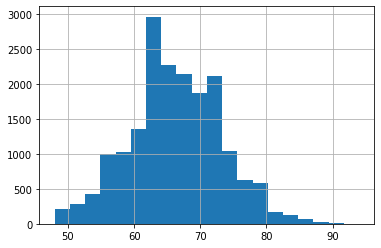

In [10]:
# Vemos distribucion de los puntajes de los jugadores

df_20['overall'].hist(bins = 20)

In [11]:
# Vemos el Top10 de mejores jugadores

best_players_per_position=df_20.iloc[df_20.groupby(df_20['player_positions'])['overall'].idxmax()][['player_positions','short_name','overall']]
best_players_per_position.sort_values(by='overall', ascending=False).head(10)

player_positions         short_name  overall
0        RW, CF, ST           L. Messi       94
1            ST, LW  Cristiano Ronaldo       93
2           LW, CAM          Neymar Jr       92
3                GK           J. Oblak       91
4            LW, CF          E. Hazard       91
5           CAM, CM       K. De Bruyne       91
8                CM          L. Modrić       90
9            RW, ST           M. Salah       90
7                CB        V. van Dijk       90
15          CDM, CM           N. Kanté       89

In [12]:
# Vemos las posiciones que tienen mayor cant de jugadores

pd.DataFrame(df_20.player_positions.value_counts().sort_index()).sort_values(by='player_positions', ascending=False).head(10)

player_positions
CB                   2322
GK                   2036
ST                   1809
CM                    786
CDM, CM               731
CM, CDM               682
LB                    669
RB                    587
CDM                   363
CAM                   291

In [13]:
# Vemos los equipos con puntajes mas altos de jugadores (media)

club_avg_overall=df_20.groupby("club")["overall"].mean().reset_index().sort_values(by="overall",ascending=False)
club_avg_overall.head(10)

club    overall
226    FC Bayern München  81.304348
505          Real Madrid  80.121212
350             Juventus  80.060606
650              Uruguay  78.608696
224         FC Barcelona  78.363636
407               Mexico  78.000000
426          Netherlands  78.000000
166             Colombia  78.000000
77   Bayer 04 Leverkusen  77.280000
141              Chelsea  77.060606

**Reducimos el dataset solo a los jugadores con un puntaje mayor a 70 ptos y nos quedamos solo con las variables que representan los skills de cada jugador**

In [14]:
df_n=df_20[(df_20['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys', 
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing','skill_ball_control', 
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions','movement_balance', 
                  'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 
                  'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

34 variables numéricas de desempeño según habilidad


In [15]:
df_skills=df_n[skills_ratings]
df_skills.head()

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   
2                 87                  81                  95   
3                 14                  40                  30   
4                 79                  83                  94   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   
2                     94                     89                96   
3                     43                     60                67   
4                     94                     88                95   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   
2                  92                84                80             61   
3                  88                49                59             78   
4                  90                94                82             56   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   
2             81              49                84                    51   
3             41              78                12                    34   
4             84              63                80                    54   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   
3                       19                     11                65   
4                       41                     87                89   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   
3                   11                   68                 27   
4                   88                   91                 34   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   
3                         12                        18                  87   
4                         27                        22                  11   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0  

In [16]:
# Comprobamos valores nulos

df_skills[df_skills.isnull()].count()

attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeep

In [188]:
# Generalizamos las posiciones en una nueva columna

arqueros = ['GK']
defensores = ['SW','LB','CB','RB','RWB','LF','SUB','LCB','RW','RCB']
mediocampistas = ['DM','CM','AM','LM','LWB','RWB','RM','CDM','CAM','RCM','LDM','RDM','LCM','LAM','RAM']
delanteros = ['LW','SS','RW','CF','RF','LF','ST','LS','RS']

df_n['player_pos_normal'] = df_n['player_positions'].str.split(',',1, expand = True)[0]

In [18]:
def replace(df, col, key, val):
    m = [v in key for v in df[col]]
    df.loc[m, col] = val

In [189]:
replace(df_n,'player_pos_normal',arqueros,'Arquero')
replace(df_n,'player_pos_normal',defensores,'Defensor')
replace(df_n,'player_pos_normal',mediocampistas,'Mediocampista')
replace(df_n,'player_pos_normal',delanteros,'Delantero')

**Realizamos un analisis exploratorio del dataset de forma visual de a dos variables**

In [20]:
#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
#bool_elecc=df_n["club"]=='FC Barcelona' 
bool_elecc=df_n["player_positions"].isin(arqueros) #arqueros
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[12] 
skill_2=skills_ratings[30]  #goalkeeping_handling


palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

# iplot(fig)
fig.show(renderer="colab")

In [21]:
#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
#bool_elecc=df_n["club"]=='FC Barcelona' 
bool_elecc=df_n["player_positions"].isin(defensores) #arqueros
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[12] 
skill_2=skills_ratings[27]  #defending_standing_tackle


palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

# iplot(fig)
fig.show(renderer="colab")

In [22]:
#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
#bool_elecc=df_n["club"]=='FC Barcelona' 
bool_elecc=df_n["player_positions"].isin(mediocampistas)
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[12] 
skill_2=skills_ratings[17]  #power_stamina


palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

# iplot(fig)
fig.show(renderer="colab")

In [23]:
#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
#bool_elecc=df_n["club"]=='FC Barcelona' 
bool_elecc=df_n["player_positions"].isin(delanteros)
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[12] 
skill_2=skills_ratings[5]  #skill_dribbling


palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

# iplot(fig)
fig.show(renderer="colab")

 **Interpretacion:** *Para realizar la exploracion visual de los jugadores sin aplicar un modelo de clustering, fuimos utilizando algunos skills que "suponemos" caracterizan a cada posicion. De esta forma, intentamos separar a los jugadores de acuerdo a su posicion, teniendo en cuenta el skill caracteristico de cada posicion. La separacion "perfecta" solo se dio para el caso de los arqueros al utilizar la variable* **goalkeeping_handling** *Para los defesores, utilizamos* **defending_standing_tackle** *, un que separacion fue bastante buena, pudimos notar que algunos jugadores de otras posiciones se mezclaron. En el caso de los delanteros, se utilizo la variable* **skill_dribbling** *, y ocurrio algo bastante parecido al intentar agrupar a los defensores, se pudo realizar pero con algo de ruido. El dato de color, es que al intentar separarlos, nos dimos cuenta que la mayoria de los delanteros son considerados 'cracks'. Por ultimo, fracasamos al intentar encontrar una variable que caracterice y pueda separar a los mediocampistas, un que teniamos el presentimiento de que esto sucediera, ya que desempeñan ambas funciones, las de atacar y defender.* 



---



**Aplicaremos K-means al dataset de los jugadores e intentaremos encontrar la cantidad de clusters que mejor se adapte a los datos**

In [24]:
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  12232955.544392753


**Utilizamos el criterio del codo para encontrar la cantidad de clusters apropiados para el dataset**

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

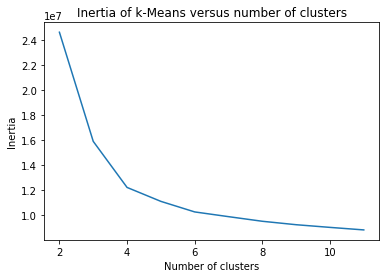

In [25]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Automatically created module for IPython interactive environment
Para n_clusters = 2 El silhouette_score promedio es : 0.6252707111708773
Para n_clusters = 3 El silhouette_score promedio es : 0.35720510292248747
Para n_clusters = 4 El silhouette_score promedio es : 0.32856786184047904
Para n_clusters = 5 El silhouette_score promedio es : 0.28558169982036785
Para n_clusters = 6 El silhouette_score promedio es : 0.23407256241558383
Para n_clusters = 7 El silhouette_score promedio es : 0.2232686608622496
Para n_clusters = 8 El silhouette_score promedio es : 0.19785364167675684


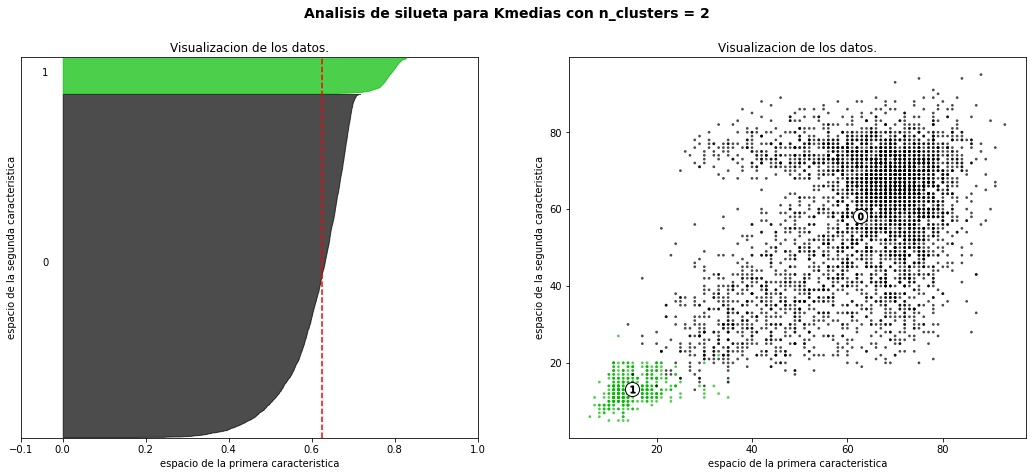

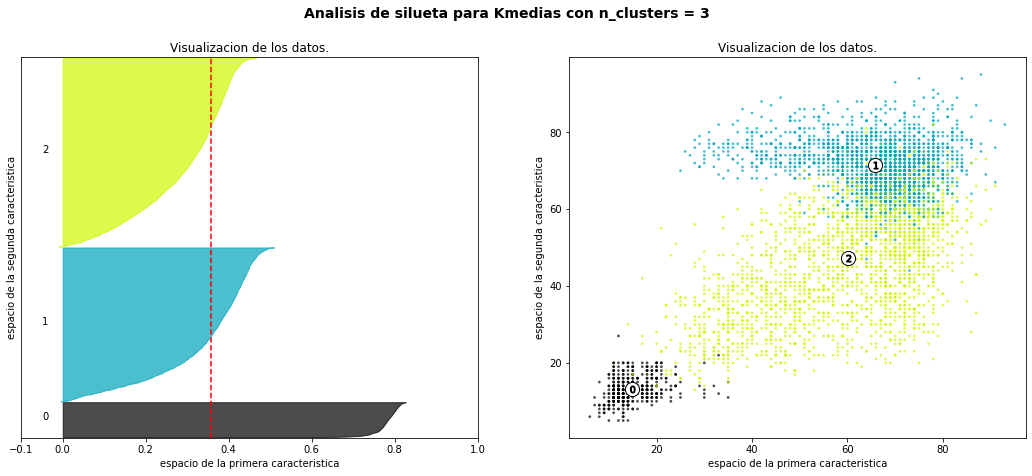

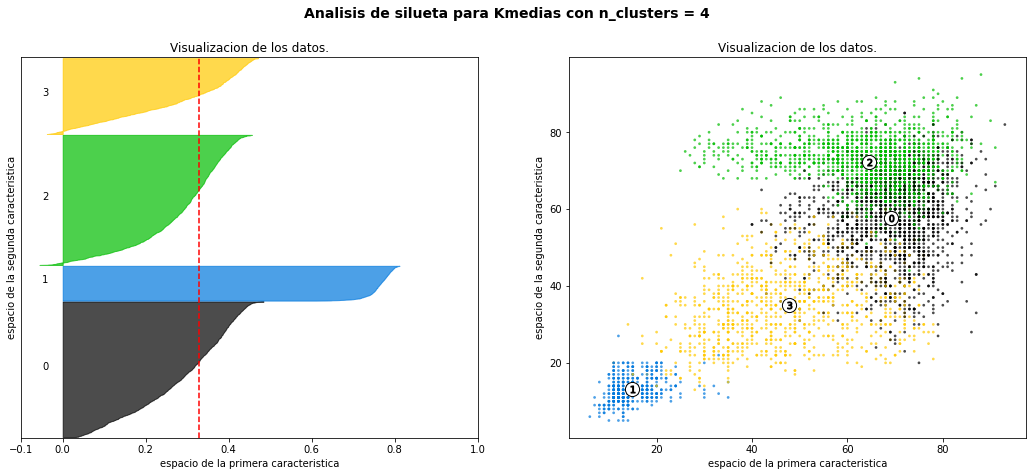

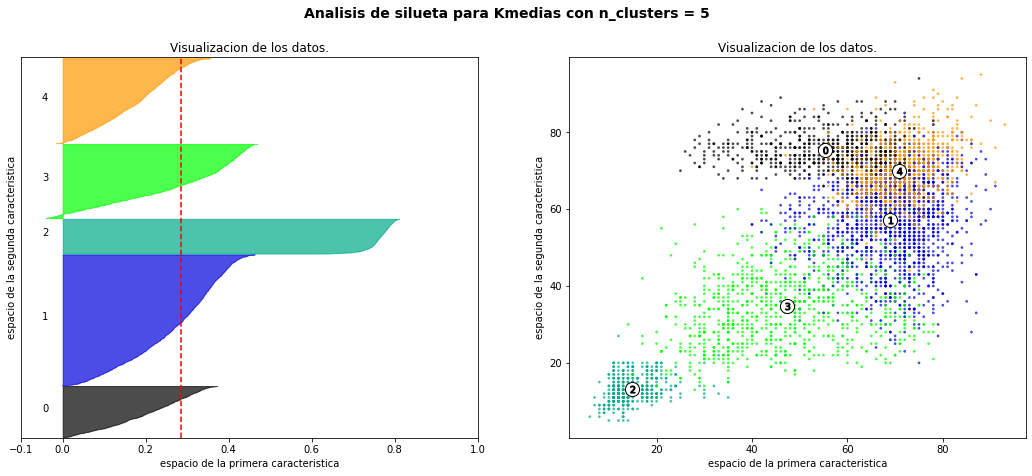

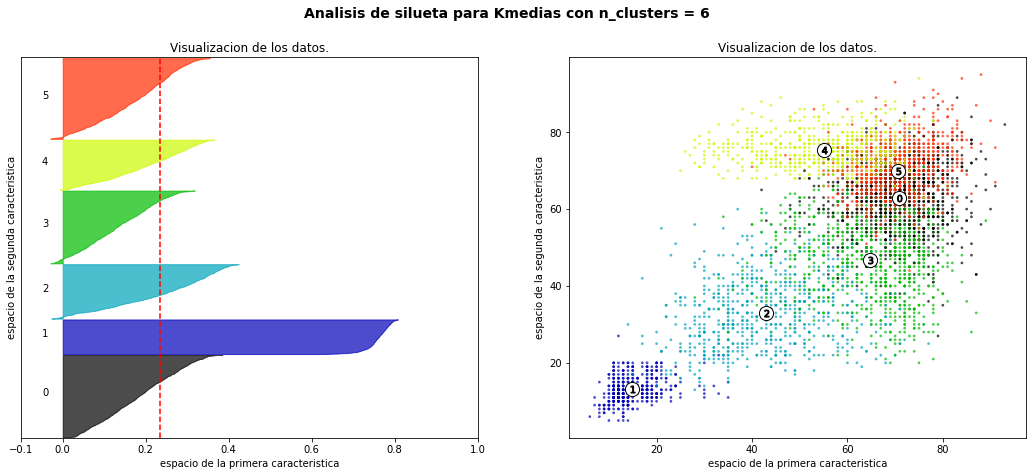

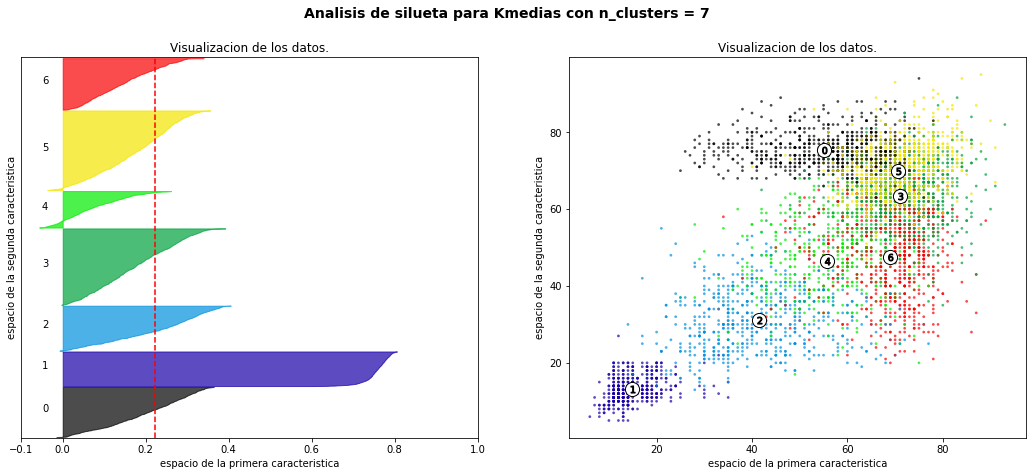

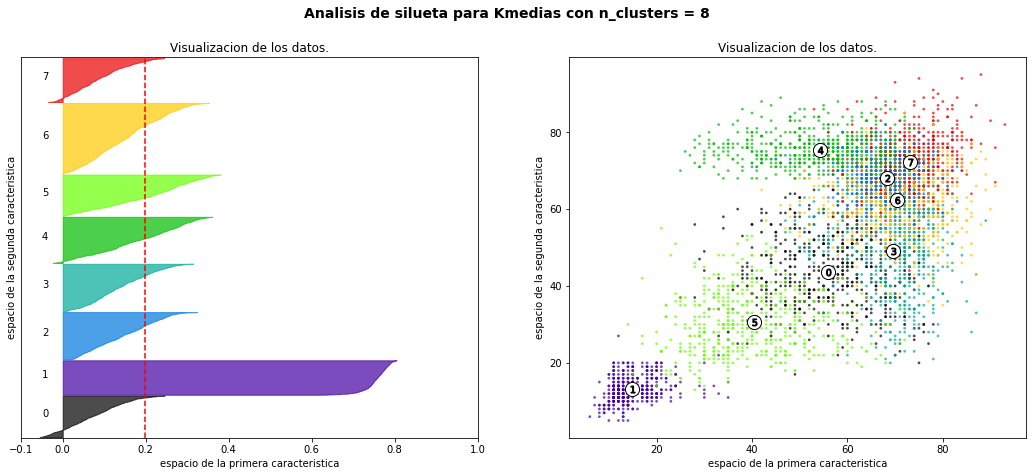

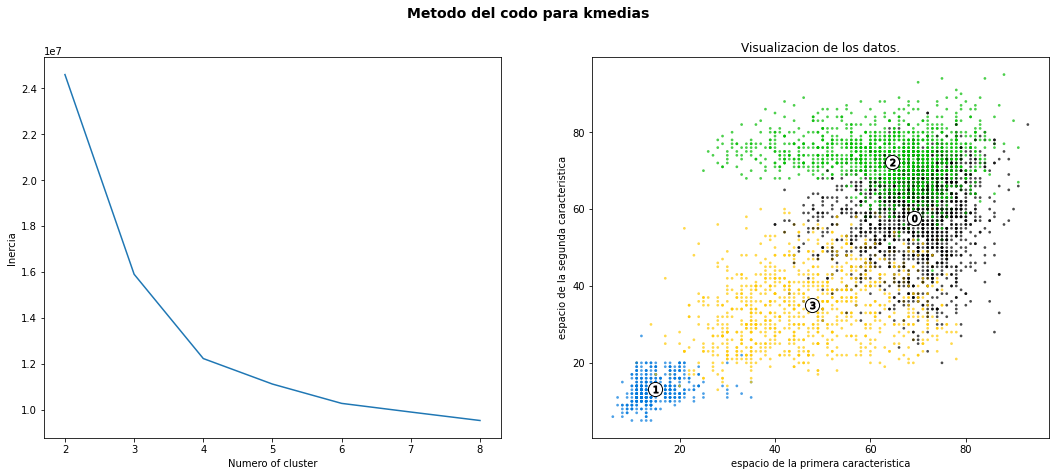

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
'''
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
'''
range_n_clusters = [2,3, 4, 5, 6, 7, 8]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_skills.iloc[:, 0], df_skills.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(df_skills)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(df_skills.iloc[:, 0], df_skills.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()



**Comprobamos que el ultimo codo que tiene gran visibilidad se puede apreciar al utilizar 4 clusters y ademas vemos que en el grafico de siluetas es el "mas homogeneo", por lo cual dejamos al modelo con dicho hiperparametro**


In [27]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[22]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'player_pos_normal'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float),
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer="colab")

In [191]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters

**Revisamos la distribucion de los jugadores en los distintos clusters**

In [29]:
df_clusters.groupby('kmeans').sofifa_id.count().reset_index(name='Cantidad')

kmeans  Cantidad
0       0      1713
1       1       440
2       2      1644
3       3       959

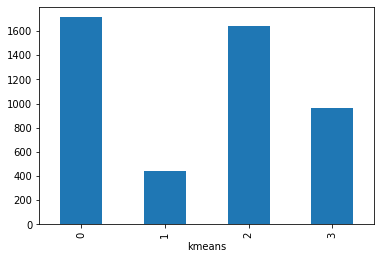

In [193]:
df_clusters.groupby("kmeans").sofifa_id.count().plot(kind='bar', stacked=True)

**Vemos la cantidad cada tipo de jugador en cada cluster**

In [192]:
df = pd.crosstab(df_clusters.kmeans, df_clusters.player_pos_normal)
df

player_pos_normal  Arquero  Defensor  Delantero  Mediocampista
kmeans                                                        
0                        0       601         18           1094
1                      440         0          0              0
2                        0       103        855            686
3                        0       861          0             98

In [194]:
analisis = ['kmeans','skill_dribbling','power_stamina','defending_standing_tackle',
            'goalkeeping_handling']
df_clusters[analisis].groupby("kmeans").describe()

skill_dribbling                                                      \
                 count       mean        std   min   25%   50%   75%   max   
kmeans                                                                       
0               1713.0  72.287215   6.025292  43.0  69.0  72.0  76.0  92.0   
1                440.0  15.400000   4.273028   7.0  12.0  15.0  18.0  30.0   
2               1644.0  75.181873   6.030084  53.0  71.0  75.0  79.0  97.0   
3                959.0  53.881126  10.348038  22.0  47.0  55.0  62.0  77.0   

       power_stamina                                                      \
               count       mean        std   min   25%   50%   75%   max   
kmeans                                                                     
0             1713.0  77.622300   8.788687  33.0  73.0  78.0  84.0  97.0   
1              440.0  33.927273   6.619099  13.0  30.0  34.0  40.0  45.0   
2             1644.0  69.956813   8.839474  30.0  65.0  71.0  76.0  93.0   
3              959.0  68.761210  10.347829  29.0  64.0  69.0  75.0  93.0   

       defending_standing_tackle                                          \
                           count       mean        std   min   25%   50%   
kmeans                                                                     
0                         1713.0  71.298307   6.868787  44.0  68.0  72.0   
1                          440.0  14.579545   3.373222   7.0  12.0  14.0   
2                         1644.0  33.782847  11.051461  10.0  25.0  33.0   
3                          959.0  75.296142   4.256384  63.0  72.0  75.0   

                   goalkeeping_handling                                   \
         75%   max                count       mean       std   min   25%   
kmeans                                                                     
0       76.0  92.0               1713.0  10.660245  3.516173   1.0   8.0   
1       17.0  24.0                440.0  72.715909  4.729948  61.0  69.0   
2       41.0  66.0               1644.0  10.627737  3.098915   1.0   8.0   
3       78.0  91.0                959.0  10.838373  3.325417   3.0   8.0   

                          
         50%   75%   max  
kmeans                    
0       11.0  13.0  62.0  
1       72.0  75.0  92.0  
2       11.0  13.0  25.0  
3       11.0  13.0  40.0

In [195]:
df_clusters.pivot_table(index = "kmeans", values = "skill_dribbling")

skill_dribbling
kmeans                 
0             72.287215
1             15.400000
2             75.181873
3             53.881126

In [196]:
df_clusters.pivot_table(index = "kmeans", values = "defending_standing_tackle")

defending_standing_tackle
kmeans                           
0                       71.298307
1                       14.579545
2                       33.782847
3                       75.296142

**Interpretacion:** *Como mencionamos anteriormente, se decidio utilizar el valor de 4 para el hiperparametro que determina la candidad de clusters a generar por K-means. Analizando los resultados, visualizamos que los clusters 0 y 2 son los mas poblados. En cuanto a la distribucion de los jugadores por sus puestos, se ve claramente por las variables explicativas elegidas (skills) un comportamiento similar al primer analisis visual que realizamos. Donde en el cluster 1 se han agrupado a todos los arqueros bien diferenciados, los delanteros parecen estar mayormente agrupados en el cluster 2 (el skill* **skill_dribbling** *nos permite deducir esto) y hemos tenido problemas para encontrar un solo cluster que caracterice a los defensores o mediocampistas. Podemos visualizar que tanto los defensores como los mediocampistas estan distribuidos por todos los clusters (salvo el de los arqueros para los mediocampistas) y esto suponemos que sucede por su caracteristicas tan similares.*

**Realizamos una nueva clusterizacion aplicando Mean Shift**

In [197]:
# Calculamos automaticamente el hiperparametro bandwidth
bandwidth = estimate_bandwidth(df_skills, quantile=0.3, n_samples=500)
bandwidth

98.47657960940971

In [198]:
ms = MeanShift(bandwidth = bandwidth)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 2


In [199]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[22]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer="colab")

In [200]:
df_clusters['meanshift'] = ms.labels_

In [201]:
df_clusters.groupby('meanshift').sofifa_id.count().reset_index(name='Cantidad')

meanshift  Cantidad
0          0      4316
1          1       440

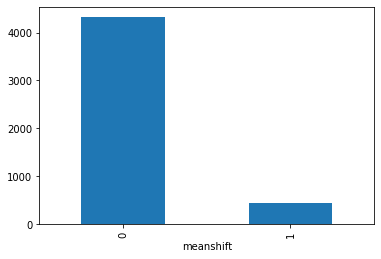

In [202]:
df_clusters.groupby("meanshift").sofifa_id.count().plot(kind='bar', stacked=True)

In [203]:
df = pd.crosstab(df_clusters.meanshift, df_clusters.player_pos_normal)
df

player_pos_normal  Arquero  Defensor  Delantero  Mediocampista
meanshift                                                     
0                        0      1565        873           1878
1                      440         0          0              0

In [204]:
analisis = ['meanshift','skill_dribbling','power_stamina','defending_standing_tackle',
            'goalkeeping_handling']
df_clusters[analisis].groupby("meanshift").describe()

skill_dribbling                                                      \
                    count       mean        std   min   25%   50%   75%   max   
meanshift                                                                       
0                  4316.0  69.300046  11.026529  22.0  65.0  72.0  76.0  97.0   
1                   440.0  15.400000   4.273028   7.0  12.0  15.0  18.0  30.0   

          power_stamina                                                      \
                  count       mean        std   min   25%   50%   75%   max   
meanshift                                                                     
0                4316.0  72.733550  10.005139  29.0  67.0  73.0  79.0  97.0   
1                 440.0  33.927273   6.619099  13.0  30.0  34.0  40.0  45.0   

          defending_standing_tackle                                          \
                              count       mean        std   min   25%   50%   
meanshift                                                                     
0                            4316.0  57.896664  20.721258  10.0  38.0  68.0   
1                             440.0  14.579545   3.373222   7.0  12.0  14.0   

                      goalkeeping_handling                                   \
            75%   max                count       mean       std   min   25%   
meanshift                                                                     
0          74.0  92.0               4316.0  10.687442  3.320199   1.0   8.0   
1          17.0  24.0                440.0  72.715909  4.729948  61.0  69.0   

                             
            50%   75%   max  
meanshift                    
0          11.0  13.0  62.0  
1          72.0  75.0  92.0

In [205]:
df_clusters.pivot_table(index = "meanshift", values = "skill_dribbling")

skill_dribbling
meanshift                 
0                69.300046
1                15.400000

In [206]:
df_clusters.pivot_table(index = "meanshift", values = "defending_standing_tackle")

defending_standing_tackle
meanshift                           
0                          57.896664
1                          14.579545

**Interpretacion:** *Al utiizar Mean Shift para la obtencion de los clusters, podemos visualizar claramente que el algoritmo discrimina entre los jugadores del campo de juego y los arqueros. Dificultandose asi, la caracterizacion de los clusters con respecto a las caracteristicas de cada posicion de los jugadores*


**Aplicamos algunos algoritmos jerarquicos**

*AgglomerativeClustering (Cityblock)*

In [207]:
ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                             linkage='single', affinity='manhattan')
ac.fit(df_skills)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0,
                        linkage='single', memory=None, n_clusters=None)

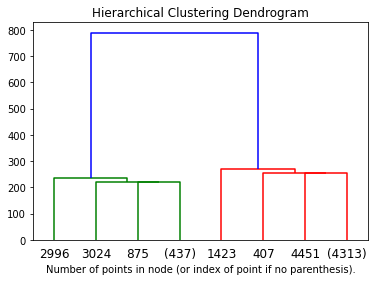

In [208]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    return linkage_matrix



# setting distance_threshold=0 ensures we compute the full tree.

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
a = plot_dendrogram(ac, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Nuevamente visualizamos que el algoritmo reconoce 2 clusters distintos


In [209]:
ac = AgglomerativeClustering(n_clusters=2, 
                             linkage='single', affinity='manhattan')
ac.fit(df_skills)
clusters3 = ac.labels_

In [210]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[22]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters3.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="AgglomerativeClustering",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer="colab")

In [211]:
df_clusters['AgglomerativeClustering'] = ac.labels_

In [212]:
df_clusters.groupby('AgglomerativeClustering').sofifa_id.count().reset_index(name='Cantidad')

AgglomerativeClustering  Cantidad
0                        0      4316
1                        1       440

In [213]:
df = pd.crosstab(df_clusters.AgglomerativeClustering, df_clusters.player_pos_normal)
df

player_pos_normal        Arquero  Defensor  Delantero  Mediocampista
AgglomerativeClustering                                             
0                              0      1565        873           1878
1                            440         0          0              0

Aplicamos HDBSCAN

In [214]:
#!pip install hdbscan

In [215]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=3,
                            min_samples=1, 
                            gen_min_span_tree=True,
                            metric='cityblock',
                            algorithm ='boruvka_kdtree',
                            #cluster_selection_epsilon = 0.5,
                            cluster_selection_method='eom')
hdb = clusterer.fit(df_skills)
hdb_labels = hdb.labels_
hdb_prob = hdb.probabilities_

In [216]:
np.unique(hdb_labels)

array([0, 1])

In [217]:
df_clusters['hdbscan_label'] = hdb_labels
df_clusters['hdbscan_probabilities'] = hdb_prob

In [218]:
data=[]

hdbscan_clusters = go.Scatter(x=df_skills.skill_dribbling, y=df_skills.mentality_positioning,
                           mode='markers',
                           text=df_20.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = hdb_labels.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[hdbscan_clusters]

layout = go.Layout(title="HBSCAN",titlefont=dict(size=20),
                xaxis=dict(title='SKILL_DRIBBLING'),
                yaxis=dict(title='MENTALITY_POSITIONING'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer="colab")

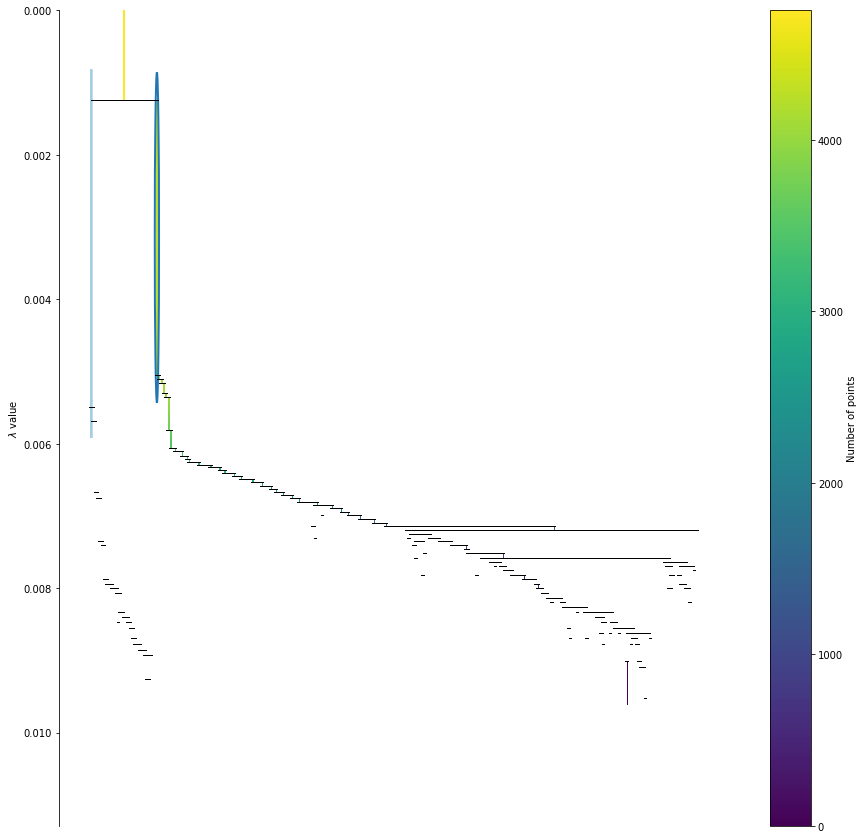

In [219]:
cant_cluster = len(np.unique(hdb_labels))
color_palette = sns.color_palette('Paired', cant_cluster)

plt.figure(figsize=(15,15))
hdb.condensed_tree_.plot(select_clusters=True,
                               selection_palette=color_palette)

In [220]:
df_clusters.groupby('hdbscan_label').short_name.count().reset_index(name='q_clusters').sort_values(['q_clusters'],ascending=False)

hdbscan_label  q_clusters
1              1        4316
0              0         440

In [221]:
df = pd.crosstab(df_clusters.hdbscan_label, df_clusters.player_pos_normal)
df

player_pos_normal  Arquero  Defensor  Delantero  Mediocampista
hdbscan_label                                                 
0                      440         0          0              0
1                        0      1565        873           1878

**Interpretacion:** *Ambos algoritmos jerarquicos distribuyen a los jugadores en dos clusters, realizando la misma discriminacion entre jugadores del campo y los arqueros*



---



## Embeddings

Trasnformamos el espacio de dim 34 en un espacio de dimensión 2 (n_components=2)

In [222]:
df_skills

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                     88                   95                          70   
1                     84                   94                          89   
2                     87                   87                          62   
3                     13                   11                          15   
4                     81                   84                          61   
...                  ...                  ...                         ...   
4751                  58                   70                          54   
4752                  57                   71                          66   
4753                  70                   53                          61   
4754                  58                   54                          68   
4755                  48                   42                          65   

      attacking_short_passing  attacking_volleys  skill_dribbling  \
0                          92                 88               97   
1                          83                 87               89   
2                          87                 87               96   
3                          43                 13               12   
4                          89                 83               95   
...                       ...                ...              ...   
4751                       68                 59               64   
4752                       64                 75               74   
4753                       70                 51               69   
4754                       66                 50               67   
4755                       73                 42               61   

      skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0              93                 94                  92                  96   
1              81                 76                  77                  92   
2              88                 87                  81                  95   
3              13                 14                  40                  30   
4              83                 79                  83                  94   
...           ...                ...                 ...                 ...   
4751           62                 41                  65                  73   
4752           67                 68                  58                  75   
4753           70                 53                  77                  68   
4754           49                 53                  64                  69   
4755           48                 39                  66                  66   

      movement_acceleration  movement_sprint_speed  movement_agility  \
0                        91                     84                93   
1                        89                     91                87   
2                        94                     89                96   
3                        43                     60                67   
4                        94                     88                95   
...                     ...                    ...               ...   
4751                     62                     71                72   
4752                     66                     62                67   
4753                     60                     57                67   
4754                     62                     66                64   
4755                     56                     70                62   

      movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                     95                95                86             68   
1                     96                71                95             95   
2                     92                84                80             61   
3                     88                49                59             78   
4                     90       

In [223]:
from sklearn import (manifold, decomposition)

import time
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(df_skills)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4756 samples in 0.023s...
[t-SNE] Computed neighbors for 4756 samples in 1.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4756
[t-SNE] Computed conditional probabilities for sample 2000 / 4756
[t-SNE] Computed conditional probabilities for sample 3000 / 4756
[t-SNE] Computed conditional probabilities for sample 4000 / 4756
[t-SNE] Computed conditional probabilities for sample 4756 / 4756
[t-SNE] Mean sigma: 12.705426
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.761566
[t-SNE] KL divergence after 1000 iterations: 1.822351
t-SNE done! Time elapsed: 40.60617017745972 seconds


In [224]:
X_tsne[1990:2000] #diez jugadores

array([[ 20.504284 ,  31.785238 ],
       [-23.399014 , -16.849348 ],
       [  6.0772467,  78.72863  ],
       [  3.7305465,  68.748474 ],
       [  6.6988072,  49.20421  ],
       [ -2.033415 ,  78.41647  ],
       [ 11.421067 ,  34.370766 ],
       [-14.498561 , -19.157764 ],
       [-10.557888 , -59.651905 ],
       [-27.099468 ,   5.691818 ]], dtype=float32)

In [225]:
len(X_tsne)

4756

In [226]:
data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_n.loc[:,'player_positions'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer='colab')

In [227]:
df_n['player_pos_normal'].value_counts()

Mediocampista    1878
Defensor         1565
Delantero         873
Arquero           440
Name: player_pos_normal, dtype: int64

In [228]:
bool_striker= df_n['player_pos_normal'] == 'Delantero'
bool_midfielder= df_n['player_pos_normal'] == 'Mediocampista'
bool_defender= df_n['player_pos_normal'] == 'Defensor'
bool_gk= df_n['player_pos_normal'] == 'Arquero'

bool_crack=df_n["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_n.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_n.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_n.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_n.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_n.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=1150)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer='colab')

**Aplicamos K-means y Mean Shift sobre TSNE**

In [229]:
columns = ['tsne1','tsne2']
X_tsne_df = pd.DataFrame(X_tsne, columns=columns)
X_tsne_df.sample(5)

tsne1      tsne2
336  -28.525139  15.232167
4348 -12.757625  11.303552
2518   2.528072 -48.998837
2107  66.003754 -21.453730
4304   7.300949   7.490286

In [231]:
df_new = pd.concat([df_20, X_tsne_df], axis=1)
df_new.sample(5)

sofifa_id                                         player_url  \
1907      162221  https://sofifa.com/player/162221/faris-haroun/...   
5639      236111  https://sofifa.com/player/236111/vinicius-luci...   
14890     251289  https://sofifa.com/player/251289/thomas-keller...   
15721     206039  https://sofifa.com/player/206039/joey-jones/20...   
14412     245722  https://sofifa.com/player/245722/gustav-henrik...   

             short_name                      long_name  age         dob  \
1907          F. Haroun                   Faris Haroun   33  1985-09-22   
5639   Vinicius Trieiro  Vinicius Lúcio Trieiro Lobato   27  1992-02-29   
14890         T. Keller                  Thomas Keller   19  1999-08-05   
15721          J. Jones                     Joey Jones   25  1994-04-25   
14412     G. Henriksson              Gustav Henriksson   21  1998-02-03   

       height_cm  weight_kg       nationality              club  overall  \
1907         188         75           Belgium  Royal Antwerp FC       75   
5639         177         73            Brazil          Botafogo       70   
14890        187         80           Germany  FC Ingolstadt 04       60   
15721        185         76  Northern Ireland      Salford City       59   
14412        186         79            Sweden       IF Elfsborg       61   

       potential  value_eur  wage_eur player_positions preferred_foot  \
1907          75    3200000     12000          CDM, CM          Right   
5639          70    1600000     11000               RB          Right   
14890         71     325000      1000               CB          Right   
15721         64     190000      3000          CDM, CB          Right   
14412         66     300000      1000               CB          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
1907                          1          3            3      High/High   
5639                          1          3            3  Medium/Medium   
14890                         1          3            2  Medium/Medium   
15721                         1          3            2    Medium/High   
14412                         1          2            2     Low/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
1907     Normal        No           4900000.0     #Engine           LDM   
5639     Normal        No           3000000.0         NaN           SUB   
14890    Normal        No            536000.0         NaN           SUB   
15721    Normal        No            347000.0         NaN           SUB   
14412    Normal        No            398000.0         NaN           SUB   

       team_jersey_number loaned_from      joined  contract_valid_until  \
1907                 38.0         NaN  2017-01-01                2020.0   
5639                 14.0         NaN  2016-02-01                2022.0   
14890                27.0         NaN  2019-07-01                2022.0   
15721                25.0         NaN  2019-06-04                2021.0   
14412                 5.0         NaN  2018-08-21                2020.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
1907              NaN                   NaN  55.0      68.0     65.0   
5639              NaN                   NaN  74.0      44.0     63.0   
14890             NaN                   NaN  58.0      25.0     29.0   
15721             NaN                   NaN  63.0      46.0     51.0   
14412             NaN                   NaN  62.0      39.0     56.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
1907        67.0       74.0    82.0        NaN          NaN         NaN   
5639        67.0       66.0    68.0        NaN          NaN         NaN   
14890       37.0       59.0    63.0        NaN          NaN         NaN   
15721       59.0       55.0    69.0        NaN          NaN         NaN   
14412       46.0       59.0    61.0        NaN          NaN         NaN   

  

In [234]:
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(X_tsne_df)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  2039950.0952345827


In [235]:
X_tsne_df['clusters_kmeans'] = km.labels_
X_tsne_df.groupby('clusters_kmeans').tsne1.count().reset_index(name='Cantidad')

clusters_kmeans  Cantidad
0                0      1497
1                1      1638
2                2       445
3                3      1176

In [237]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[22]


kmean_clusters = go.Scatter(x=X_tsne_df.tsne1, y=X_tsne_df.tsne2,
                           mode='markers',
                        text=df_20.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters]#,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer='colab')

In [238]:
bandwidth_tsne = estimate_bandwidth(X_tsne_df, quantile=0.3, n_samples=500)
bandwidth_tsne

41.82462894890044

In [245]:
ms = MeanShift(bandwidth=bandwidth_tsne)

ms.fit(X_tsne_df)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 3


In [246]:
X_tsne_df['clusters_meanshift'] = ms.labels_
X_tsne_df.groupby('clusters_meanshift').tsne1.count().reset_index(name='Cantidad')

clusters_meanshift  Cantidad
0                   0      2483
1                   1      1828
2                   2       445

In [247]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]


MeanShift_clusters = go.Scatter(x=X_tsne_df.tsne1, y=X_tsne_df.tsne2,
                           mode='markers',
                        text=df_20.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters]#,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer='colab')

Aplicamos PCA para reducción de dimensión de n dimensiones a m dimensiones con 'm<<n'

In [250]:
# Eliminamos a los arqueros y a los jugadores con bajo puntaje

df_acp=df_20[(df_20["player_positions"]!='GK')&(df_20['overall']>70)]
df_acp_skills=df_acp[skills_ratings]
print('los datos tienen dimesión n= ',len(skills_ratings))

los datos tienen dimesión n=  34


In [252]:
from sklearn import preprocessing

# Normalizamos las variable de entrada ya que pca los centra pero no los normaliza

std_scale=preprocessing.StandardScaler().fit(df_acp_skills)
df_acp_scaled=std_scale.transform(df_acp_skills) # numpyarray normalizado por columna

print(df_acp_scaled[0:2])
df_acp_skills.head(2)

[[ 1.85191727  2.22591719  0.50579762  3.10516247  2.04822158  2.51241012
   2.10810769  2.43109902  2.66408211  3.18353021  1.64821701  1.12843689
   1.84130682  4.14284295  2.07189558  1.52906387 -0.08406758  0.22655488
  -0.19387423  2.1898988  -1.4663244  -0.88327707  2.03265645  2.40441334
   1.23931568  3.66320434 -1.29845475 -1.00858184 -1.34122585 -1.3448052
   0.09414922  1.26933893  0.96458131 -0.78491947]
 [ 1.55947807  2.16540639  2.10231142  1.74199744  1.98481151  1.7868031
   1.30894567  1.31434768  1.17375414  2.6471945   1.4928247   1.69221681
   1.36330133  4.32209798  0.25161067  2.3556585   2.17528741  1.22615709
   0.66487084  2.12277809 -0.34105661 -1.43450959  2.09945366  1.42414494
   2.0028642   3.51747437 -1.56314263 -1.24990788 -1.43455936 -1.05324047
   0.09414922  1.26933893  0.96458131  0.12469633]]


attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  92                  96   
1                 76                  77                  92   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     84                93   
1                     89                     91                87   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  95                95                86             68   
1                  96                71                95             95   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             75              68                94                    48   
1             85              78                93                    63   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   

   goalkeeping_reflexes  
0                     8  
1                    11

In [259]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=12) #elegimos 2, 3 o 4 pero pueden ser más, 

pca.fit(df_acp_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

pca_projected=pca.transform(df_acp_scaled) #numpy array
print ('tamaño de los datos: ', pca_projected.shape)

proporción de varianza por componente:  [0.35440524 0.13890671 0.08944118 0.05568804 0.05419149 0.02962259
 0.02439952 0.02423545 0.02319538 0.02264586 0.02154912 0.01647999]
proporción de varianza por componente acumulada:  [0.35440524 0.49331195 0.58275314 0.63844118 0.69263267 0.72225525
 0.74665477 0.77089022 0.7940856  0.81673146 0.83828059 0.85476058]
tamaño de los datos:  (4316, 12)


In [261]:
print (pca_projected[0:5])

[[-9.58114164 -3.38616237  1.95525808  0.64525241 -0.97063029  3.23820282
   1.29108606  0.7475964  -1.15121077 -0.1544051  -0.99277117  0.57065086]
 [-7.70003701 -1.83078731  3.77801357  3.12828995 -3.17721144  2.29336435
   0.76665595  0.26680326 -1.26222337 -0.31322137 -0.75137966  0.6073374 ]
 [-9.23746083 -2.11012527  0.85641906  1.05477167 -0.37657924  3.17633821
   1.25706387 -0.30590744 -0.8183201   0.4414581  -0.51559497  0.23009507]
 [-8.6343192  -2.14512837  0.7010502  -0.30169636 -1.57343003  2.65506465
  -0.39610229  0.61610979  1.68632782  0.19610157 -0.12114427 -0.33992581]
 [-6.72432798 -5.36538944  2.22031442  0.6854798  -0.40435171  0.87162623
  -1.31148114 -0.24841569  2.23048659  0.51300121 -0.19604258 -0.22155234]]


In [262]:
pcs=pca.components_  #"composición" de las primeras componentes, 
print(pcs)  # el aporte/pesos de las variables: skills_ratings

[[-2.00171691e-01 -2.44500089e-01  1.38740475e-01 -1.52219651e-01
  -2.34145732e-01 -2.57242546e-01 -2.35355703e-01 -2.04189467e-01
  -6.89227245e-02 -2.41131057e-01 -1.78742590e-01 -1.47881674e-01
  -2.18336722e-01 -9.07713480e-02 -1.90276332e-01 -1.91858897e-01
   7.00510935e-02 -5.13165412e-02  1.60701862e-01 -2.38722824e-01
   1.39465761e-01  1.63663063e-01 -2.51244552e-01 -2.31775916e-01
  -1.99158184e-01 -1.11085910e-01  1.68550759e-01  1.71419523e-01
   1.74546187e-01  6.15554731e-03  4.49830755e-03  1.47183978e-03
   1.38063738e-02  7.75773976e-03]
 [-1.76042055e-01  9.61280596e-02  5.06024428e-03 -3.16636521e-01
   3.78170487e-02 -6.51051871e-02 -1.10960397e-01 -1.11021647e-01
  -3.61369062e-01 -1.44033431e-01  6.02650994e-02  7.98191479e-02
   2.42307048e-03 -2.20577349e-01 -5.26066932e-02 -3.99663740e-02
  -9.66593420e-03 -1.83427641e-01 -9.61900246e-03 -5.20582925e-02
  -2.26951590e-01 -3.47816199e-01  1.90558363e-02 -1.64203967e-01
   3.85558351e-02 -2.10272847e-01 -3.2569

In [265]:
#Graph 1
data=[]

for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=df_acp_skills.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="ACP - Fifa Skills",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=1050,height=750,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)

#plot(fig)
fig.show(renderer='colab')

In [267]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
df_20_v2 = df_20    
#Lo agregamos a la base:
df_20_v2=df_20_v2.append(MachineGunDict,ignore_index=True)
X=df_20_v2[skills_ratings] # Datos sin estandarizar
X_scaled=std_scale.transform(X) # volvemos a normalizar con el dato agregado 
#pero con la normalización de la base sin el dato nuevo
X_projected=pca.transform(X_scaled) # volvemos a proyectar pero con el dato nuevo
X_projected

array([[ -9.58114164,  -3.38616237,   1.95525808, ...,  -0.1544051 ,
         -0.99277117,   0.57065086],
       [ -7.70003701,  -1.83078731,   3.77801357, ...,  -0.31322137,
         -0.75137966,   0.6073374 ],
       [ -9.23746083,  -2.11012527,   0.85641906, ...,   0.4414581 ,
         -0.51559497,   0.23009507],
       ...,
       [  6.4787462 ,   5.77865389,  -3.06224975, ...,   0.76550738,
          0.66641728,   0.25326143],
       [  6.64027925,   5.56209849,  -3.37353209, ...,  -1.04834519,
          0.4249627 ,  -0.09966556],
       [ -7.47875272, -11.09293036,   3.69758927, ...,  -2.71105672,
          0.21409242,   1.87517336]])

In [268]:
#Graph 2
#Choose your player
recherche_joueur=df_20_v2["short_name"]=='L. Messi'

bool_crack=df_20_v2["overall"] > 85
bool_no_crack=df_20_v2["overall"]<86
bool_machinegun=df_20_v2["short_name"]=='MachineGun'

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

acp_crack =go.Scatter(x=X_projected[bool_crack,0], y=X_projected[bool_crack,1],name='Crack',
                      text=df_20_v2.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

acp_no_crack =go.Scatter(x=X_projected[bool_no_crack,0], y=X_projected[bool_no_crack,1],name='Average player',
                         text=df_20_v2.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

acp_machinegun =go.Scatter(x=X_projected[bool_machinegun,0], y=X_projected[bool_machinegun,1],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=X_projected[recherche_joueur,0], y=X_projected[recherche_joueur,1],name='Searched player',
                           text=df_20_v2.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[acp_no_crack,acp_crack,acp_machinegun,joueur_recherche]

layout = go.Layout(title="ACP - Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title='Componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#plot(fig)
fig.show(renderer='colab')

In [272]:
teamA='Real Madrid'
teamB='Inter'

bool_teamA=df_20_v2["club"]==teamA
bool_teamB=df_20_v2["club"]==teamB

palette=['navy','red','#A2D5F2','orange','green','pink','grey']  
data=[]

acp_teamA =go.Scatter(x=X_projected[bool_teamA,0], y=X_projected[bool_teamA,1],name=teamA,
                      text=df_20_v2.loc[bool_teamA,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.7,marker=dict(color=palette[1],size=10),mode='markers+text')

acp_teamB =go.Scatter(x=X_projected[bool_teamB,0], y=X_projected[bool_teamB,1],name=teamB,
                      text=df_20_v2.loc[bool_teamB,'short_name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.7,marker=dict(color=palette[4],size=10),mode='markers+text')

acp_all =go.Scatter(x=X_projected[:,0], y=X_projected[:,1],name='All',
                         text=df_20_v2.loc[:,'short_name'],
                         opacity=0.3,marker=dict(color=palette[6],size=3),mode='markers')


data=[acp_teamA,acp_teamB,acp_all]

layout = go.Layout(title="ACP - {} vs {}".format(teamA,teamB),titlefont=dict(size=20),
                xaxis=dict(title='F1'),
                yaxis=dict(title='F2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#plot(fig)
fig.show(renderer='colab')

In [273]:
df_acp=df_20[(df_20["player_positions"]!='GK')&(df_20['overall']>70)]

X=df_acp[skills_ratings] # Datos sin estandarizar
X_scaled=std_scale.transform(X) # volvemos a normalizar (ya estaba ajustada)
X_projected=pca.transform(X_scaled) #volvemos a proyectar 
print('dimensiones de la base proyectada:', X_projected.shape)

dimensiones de la base proyectada: (4316, 12)


In [274]:
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.35440524 0.13890671 0.08944118 0.05568804 0.05419149 0.02962259
 0.02439952 0.02423545 0.02319538 0.02264586 0.02154912 0.01647999]
proporción de varianza por componente acumulada:  [0.35440524 0.49331195 0.58275314 0.63844118 0.69263267 0.72225525
 0.74665477 0.77089022 0.7940856  0.81673146 0.83828059 0.85476058]
tamaño de los datos:  (4316, 12)


In [275]:
columns = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8',
           'pca_9','pca_10','pca_11','pca_12']

k-medias y visualizar los clusters encontrados en las dos primeras componentes

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

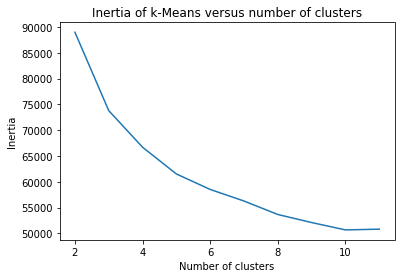

In [283]:
X_projected = pd.DataFrame(X_projected, columns=columns)

scores = [KMeans(n_clusters=i+2).fit(X_projected).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Parece tener sentido armar 5 clusters


In [295]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(X_projected)

# Recuperacion de etiquetas
clusters = km.labels_

In [285]:
df_clusters=X_projected
df_clusters['kmeans_pca'] = km.labels_ #clusters
df_clusters.groupby('kmeans_pca').pca_1.count().reset_index(name='Cantidad')

kmeans_pca  Cantidad
0           0       982
1           1       702
2           2       629
3           3      1040
4           4       963

In [286]:
df_clusters.sample(5)

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
4162  6.486704  1.415329 -0.277170 -0.573048  0.221216 -2.292191 -0.690518   
1643 -0.534940 -2.138294 -1.178699  1.592377 -0.521802 -0.992870 -1.577431   
1309  6.030350 -0.843525  1.347687  0.166880  1.596416  0.755109 -0.211747   
1453 -1.747930 -0.607094 -1.993424 -1.041914 -1.920822  1.125869 -0.098465   
3256 -0.863573 -1.288875 -1.005698 -0.309818 -1.621993 -1.238982  0.143672   

         pca_8     pca_9    pca_10    pca_11    pca_12  kmeans_pca  
4162  0.385802  0.750146 -0.864178  0.734031 -0.472403           1  
1643 -0.990165  1.261833  0.299583  0.069071 -0.407220           4  
1309 -0.575391 -1.506462  0.525072  0.122891 -0.226970           1  
1453  0.623968  0.354880 -0.383879 -0.613805  0.256255           3  
3256  0.386300 -0.136627 -0.403278 -0.302089 -0.009439           0

In [287]:
df_acp.sample(5)

sofifa_id                                         player_url  \
1472     176571  https://sofifa.com/player/176571/andre-ayew/20...   
692      183512  https://sofifa.com/player/183512/yuri-berchich...   
2102     230189  https://sofifa.com/player/230189/silas-enaldo-...   
3622     189300  https://sofifa.com/player/189300/mattias-johan...   
170      229237  https://sofifa.com/player/229237/manuel-akanji...   

          short_name                       long_name  age         dob  \
1472         A. Ayew                 André Ayew Pelé   29  1989-12-17   
692   Yuri Berchiche            Yuri Berchiche Izeta   29  1990-02-10   
2102    Silas Almeim  Silas Enaldo Barros de Almeida   27  1992-02-29   
3622    M. Johansson               Mattias Johansson   27  1992-02-16   
170        M. Akanji           Manuel Obafemi Akanji   23  1995-07-19   

      height_cm  weight_kg  nationality                     club  overall  \
1472        176         72        Ghana             Swansea City       76   
692         180         80        Spain  Athletic Club de Bilbao       79   
2102        177         76       Brazil                    Goiás       75   
3622        171         64       Sweden         Panathinaikos FC       72   
170         187         91  Switzerland        Borussia Dortmund       83   

      potential  value_eur  wage_eur player_positions preferred_foot  \
1472         76    7500000     30000           RM, ST           Left   
692          79   10500000     27000               LB           Left   
2102         75    6000000     13000           LB, LM           Left   
3622         73    3100000      1000          RB, RWB          Right   
170          88   31000000     77000               CB          Right   

      international_reputation  weak_foot  skill_moves      work_rate  \
1472                         3          3            4    High/Medium   
692                          2          3            3    High/Medium   
2102                         1          3            3  Medium/Medium   
3622                         1          3            3    High/Medium   
170                          2          3            2    Medium/High   

     body_type real_face  release_clause_eur player_tags team_position  \
1472    Normal       Yes          14300000.0         NaN           SUB   
692     Normal       Yes          22100000.0         NaN            LB   
2102    Normal        No          11400000.0         NaN            LB   
3622      Lean        No           7000000.0         NaN            RB   
170     Normal        No          53500000.0         NaN           RCB   

      team_jersey_number loaned_from      joined  contract_valid_until  \
1472                22.0         NaN  2018-01-31                2021.0   
692                 17.0         NaN  2018-07-02                2022.0   
2102                 5.0         NaN  2015-01-01                2022.0   
3622                 2.0         NaN  2017-08-04                2020.0   
170                 16.0         NaN  2018-01-15                2022.0   

     nation_position  nation_jersey_number  pace  shooting  passing  \
1472             NaN                   NaN  73.0      72.0     72.0   
692              NaN                   NaN  80.0      64.0     71.0   
2102             NaN                   NaN  79.0      56.0     70.0   
3622             NaN                   NaN  85.0      47.0     57.0   
170               CB                   5.0  78.0      45.0     68.0   

      dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
1472       78.0       56.0    75.0        NaN          NaN         NaN   
692        74.0       78.0    81.0        NaN          NaN         NaN   
2102       69.0       73.0    66.0        NaN          NaN         NaN   
3622       74.0       67.0    65.0        NaN          NaN         NaN   
170        72.0       83.0    80.0        NaN          NaN         NaN   

      gk_reflexes  gk_speed  gk_positioning  \
14

In [296]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


kmean_clusters = go.Scatter(x=df_clusters.pca_1, y=df_clusters.pca_2,
                           mode='markers',
                        text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters]#,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title='Componente1'),
                yaxis=dict(title='Componente2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer='colab')

Mean Shift y visualizar en las dos primeras componentes 

In [385]:
ms = MeanShift(bandwidth=bandwidth_pca, bin_seeding=True)

ms.fit(X_projected)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 4


In [386]:
df_clusters['meanshift'] = ms.labels_
df_clusters.groupby('meanshift').pca_1.count().reset_index(name='Cantidad')

meanshift  Cantidad
0          0      4307
1          1         4
2          2         4
3          3         1

In [387]:
data=[]

MeanShift_clusters = go.Scatter(x=df_clusters.pca_1, y=df_clusters.pca_2,
                           mode='markers',
                           text=df_acp.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=[MeanShift_clusters]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title='PCA_1'),
                yaxis=dict(title='PCA_2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
fig.show(renderer='colab')

**Conclusion:** *Estimamos que analizando las distintas tecnicas de clustering y haciendo el analisis visual de los mismos, podemos notar que la mejor distribucion de los jugadores en los clusters es cuando se realiza en 4 grupos. Donde los arqueros siempre son bien discriminados, los delanteros un poco menos y otros dos clusters donde no estan definos bien los defensores y mediocampistas a causa de que sus caracteristicas son bastantes similares.*

**Normalizacion de los datos?** *Para todas las tecnicas de clustering aplicadas, decidimos no normalizar los datos, ya que entendemos que los skills, nuestras variables input, todas se mantienen entre los valores de 30 y 99 aprox. En cambio, para realizar PCA, si necesitamos normalizar, ya que como vimos en clases, PCA de sklearn centra los datos pero nos los normaliza. Por lo que los normalizamos utilizando StandardScaler para luego aplicar PCA.*